## Credit card fraud detection dataset analysis

Dataset downloaded from Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3

Most of feature names have been removed and all features, except for time and amount have been scaled.
Also principle component analysis has been performed on these features, so correlation between them should be minimal.

## Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)
pd.set_option("display.max_rows", 10)

import warnings
warnings.filterwarnings("ignore")

In [3]:
Data = pd.read_csv("./creditcard.csv")
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


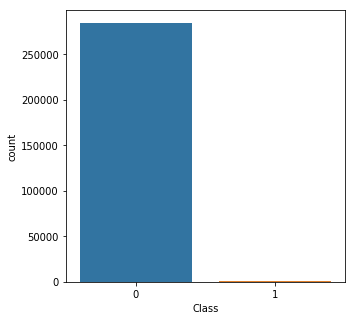

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(Data.Class, ax = ax)

Well, it seems most transactions are non-fraudulent

Since PCA has been performed on this dataset, correlation between features should be low. 

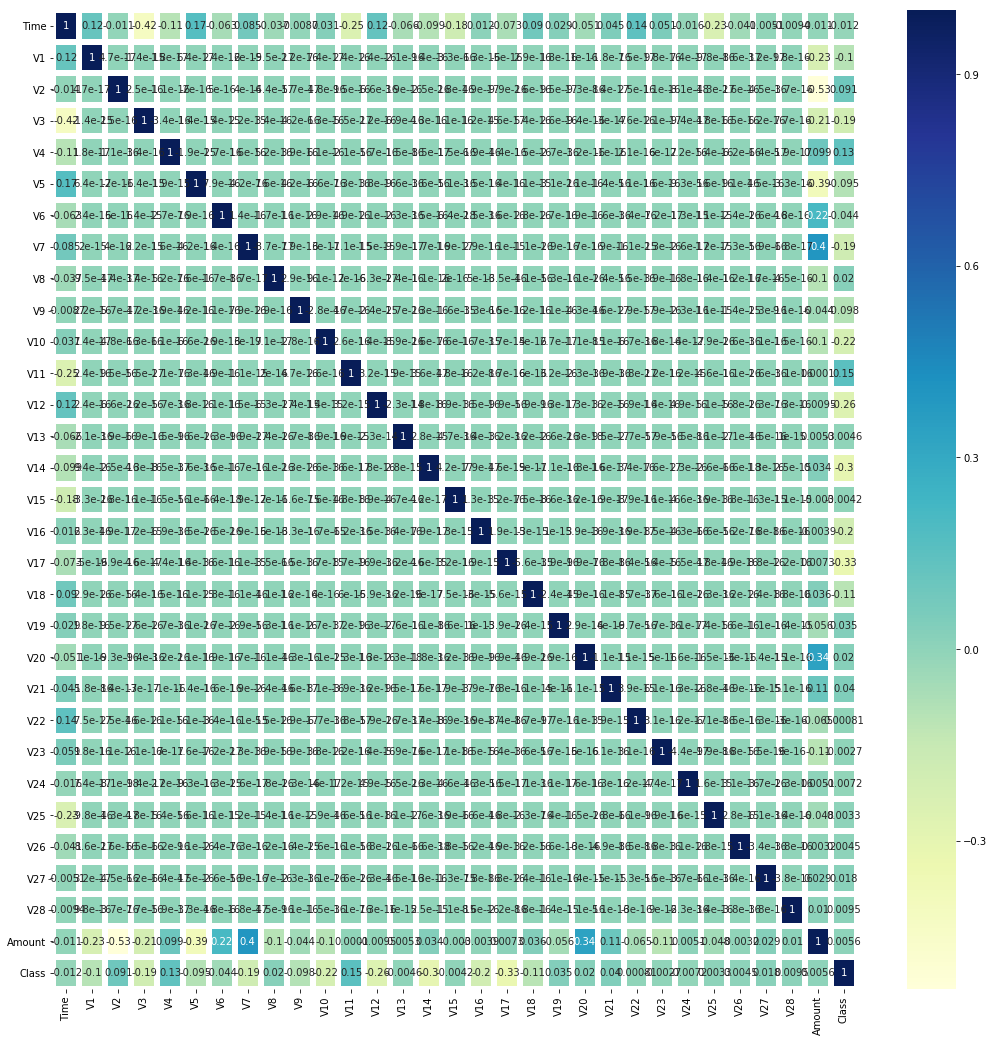

In [6]:
fig, ax = plt.subplots(figsize=(18, 18))

sns.heatmap(Data.corr(), linewidths=5, annot=True, ax=ax, cmap="YlGnBu")

Seems correlation between most features is very low, as expected.

All features, except for amount and time were scalled. I wonder what's the distribution of these features. I amount transfered will have a very skewed distribution

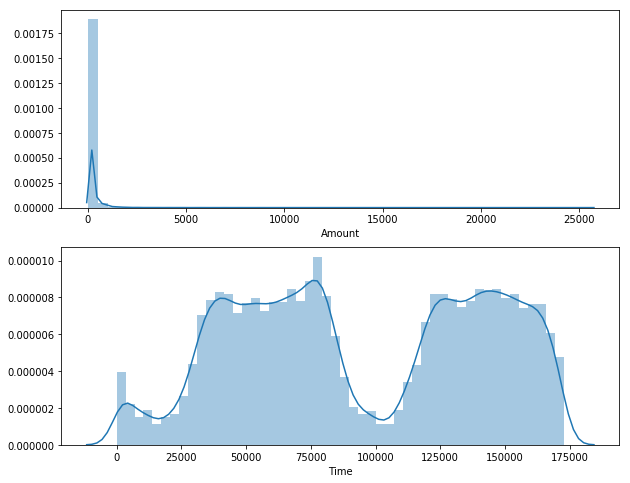

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
sns.distplot(Data.Amount, ax=ax1)
sns.distplot(Data.Time, ax=ax2)

It seems both of these features are skewed and both will need to be scaled.

Time to preprocess data, split into train, test and validation sets and scale features

In [8]:
X = Data.drop('Class', axis=1)
y = Data['Class']

In [9]:
#15% of dataset in test and 15% in validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Undersample train dataset. Select all fraudulent transactions and randomly select the same number of non-fraudulent transactions. This will ensure my dataset has a similar distribution of both fraudulent and non-fraudulent transactions but it will drop most of data.

In [10]:
#Select fraudulent transactions
y_fraud_index = y_train[y_train == 1].index
y_fraud = y_train[y_fraud_index]
X_fraud = X_train.loc[y_fraud_index,:]

#Select non-fraudulent transactions
X_non_fraud = X_train.drop(y_fraud_index).sample(len(y_fraud), random_state=42)
y_non_fraud = y_train[X_train.drop(y_fraud_index).sample(len(y_fraud), random_state=42).index]

#Concat both
X_train_selected = pd.concat([X_fraud, X_non_fraud])
y_train_selected = pd.concat([y_fraud, y_non_fraud])

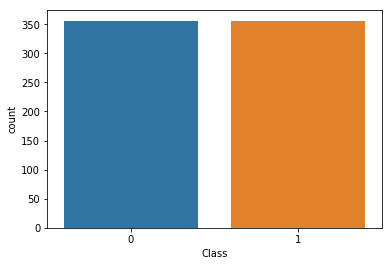

In [11]:
## Check what's the distribution now

sns.countplot(y_train_selected)

Now I should scale Time and Amount variables

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [13]:
X_train_selected[['Time', 'Amount']] = sc_X.fit_transform(X_train_selected[['Time', 'Amount']])
X_test[['Time', 'Amount']] = sc_X.transform(X_test[['Time', 'Amount']])

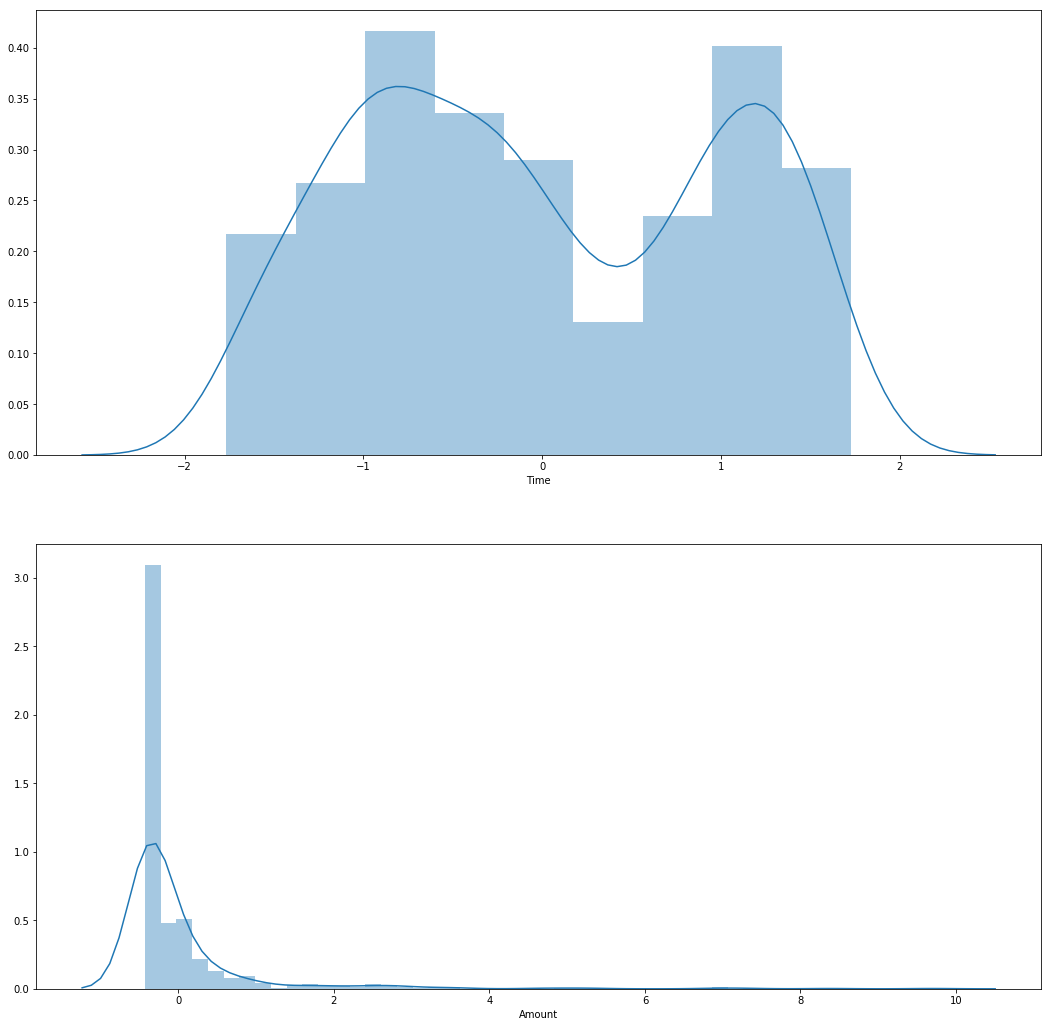

In [14]:
##Check if distribution is skewed now

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 18))
sns.distplot(X_train_selected.Time, ax=ax1)
sns.distplot(X_train_selected.Amount, ax=ax2)

Still skewed but Time distribution looks a lot better. Also range has been reduced ;)

Now that data is preprocessed, it's time to generate few models and compare them

In [15]:
def generate_pred(model, X=X_train_selected, X_test=X_test, y=y_train_selected, y_test=y_test, random_state=42):
    #print ("Generating model for ", model)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print ("The following score observer: \n \t f1_score ==> %f \
    \n \t recall_score ==> %f" %(f1, rec))
    print ("Confusion matrix: \n", cm)
    
    return f1, rec, cm

In [16]:
## Simple logistic regression with all possible data and without downsampling
## I will compare this result with all other results ;)

generate_pred(LogisticRegression(), X=X_train, y=y_train)


#print("Using simple logistic regression with all possible data we get the following results: \n \
#        f1 score: %f \n recall score: %f \n \
#        confusion matrix: \n" %(f1, rec), cm)

The following score observer: 
 	 f1_score ==> 0.013039     
 	 recall_score ==> 0.922078
Confusion matrix: 
 [[31902 10742]
 [    6    71]]


(0.013039485766758495, 0.922077922077922, array([[31902, 10742],
        [    6,    71]]))

Well, it seems it's not a good idea to use all data.

In [17]:
models = [LogisticRegression, KNeighborsClassifier, RandomForestClassifier]

for model in models:
    try:
        classifier = model(random_state=42)
    except:
        classifier = model()
    print ("generating prediction for %s" %model.__name__)
    generate_pred(model=classifier)
    
    #print ("For model %s the following score observer: \n \t f1_score ==> %f \
    #\n \t recall_score ==> %f" %(model.__name__, f1, rec))

generating prediction for LogisticRegression
The following score observer: 
 	 f1_score ==> 0.078889     
 	 recall_score ==> 0.922078
Confusion matrix: 
 [[40992  1652]
 [    6    71]]
generating prediction for KNeighborsClassifier
The following score observer: 
 	 f1_score ==> 0.114618     
 	 recall_score ==> 0.896104
Confusion matrix: 
 [[41586  1058]
 [    8    69]]
generating prediction for RandomForestClassifier
The following score observer: 
 	 f1_score ==> 0.145610     
 	 recall_score ==> 0.883117
Confusion matrix: 
 [[41855   789]
 [    9    68]]


Not too good... f1 score is very very low. 

Let's select some features (using random forest) 

In [18]:
from sklearn.feature_selection import SelectFromModel

In [19]:
clf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=1)
clf.fit(X_train_selected, y_train_selected)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [20]:
X_train_selected.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [21]:
for feature in zip(X_train_selected.columns, clf.feature_importances_):
    print (feature)

('Time', 0.005653986309737349)
('V1', 0.00795177625871321)
('V2', 0.022359345126950054)
('V3', 0.05397007313203926)
('V4', 0.12111368524940885)
('V5', 0.010533093864412531)
('V6', 0.011529465000077278)
('V7', 0.02621527103054264)
('V8', 0.011397961041212809)
('V9', 0.018558357541259042)
('V10', 0.11308761126178273)
('V11', 0.06122676059390142)
('V12', 0.1054235724288658)
('V13', 0.007309901292747452)
('V14', 0.16220571904922867)
('V15', 0.008562505187499686)
('V16', 0.048382037972495316)
('V17', 0.07801897555379973)
('V18', 0.01803516622174595)
('V19', 0.019703962817307897)
('V20', 0.01112828872319303)
('V21', 0.014420530778159791)
('V22', 0.004993931544185775)
('V23', 0.007456521198365044)
('V24', 0.005748654618675084)
('V25', 0.006317159165781134)
('V26', 0.008468423795976383)
('V27', 0.008586154862151746)
('V28', 0.007733470043985415)
('Amount', 0.01390763833579915)


OK, need something more.... interpretable

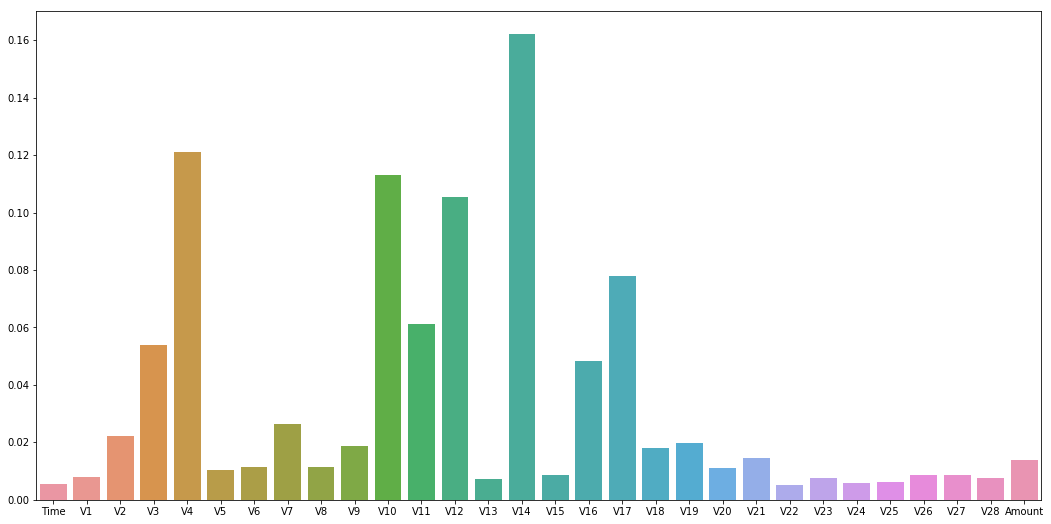

In [22]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.barplot(X_train_selected.columns, clf.feature_importances_)

A lot better ;)

In [23]:
important_features = np.argwhere(clf.feature_importances_ > 0.05).reshape(1, -1)
important_features = important_features.flatten()

In [24]:
X_train_selected = X_train_selected.iloc[:, important_features]
X_test_selected = X_test.iloc[:, important_features]

Time to rerun models with new set of features

In [25]:
X_train_selected

,V3,V4,V10,V11,V12,V14,V17
42700,-11.683706,6.702780,-13.386683,7.605559,-13.351815,-14.979477,-20.299217
6899,-7.653616,6.379742,-7.191604,7.102989,-9.928700,-10.924187,-2.775114
42009,-4.110636,5.340242,-4.466284,3.969800,-7.346717,-8.225569,-8.815785
235634,-6.556168,4.016731,-4.816401,2.155796,-6.285125,-6.800098,-5.017908
238222,-3.908229,2.942946,-3.235439,3.341802,-7.562860,-11.571423,-9.285186
...,...,...,...,...,...,...,...
212589,-1.342978,0.861983,-0.554088,0.442986,0.548322,-1.848056,1.067504
30266,2.766235,0.472523,-1.480014,0.288421,1.452717,-0.359897,0.759414
274238,-1.033903,-0.925016,-0.816668,0.201460,0.428081,1.378054,-0.753168
132280,-5.611367,0.243323,6.881532,1.588293,0.463599,-4.856750,3.321005


In [26]:
X_train_selected

,V3,V4,V10,V11,V12,V14,V17
42700,-11.683706,6.702780,-13.386683,7.605559,-13.351815,-14.979477,-20.299217
6899,-7.653616,6.379742,-7.191604,7.102989,-9.928700,-10.924187,-2.775114
42009,-4.110636,5.340242,-4.466284,3.969800,-7.346717,-8.225569,-8.815785
235634,-6.556168,4.016731,-4.816401,2.155796,-6.285125,-6.800098,-5.017908
238222,-3.908229,2.942946,-3.235439,3.341802,-7.562860,-11.571423,-9.285186
...,...,...,...,...,...,...,...
212589,-1.342978,0.861983,-0.554088,0.442986,0.548322,-1.848056,1.067504
30266,2.766235,0.472523,-1.480014,0.288421,1.452717,-0.359897,0.759414
274238,-1.033903,-0.925016,-0.816668,0.201460,0.428081,1.378054,-0.753168
132280,-5.611367,0.243323,6.881532,1.588293,0.463599,-4.856750,3.321005


In [27]:
generate_pred(LogisticRegression(), X=X_train_selected, X_test=X_test_selected)

The following score observer: 
 	 f1_score ==> 0.112721     
 	 recall_score ==> 0.909091
Confusion matrix: 
 [[41549  1095]
 [    7    70]]


(0.11272141706924316, 0.9090909090909091, array([[41549,  1095],
        [    7,    70]]))

In [28]:
models = [LogisticRegression, KNeighborsClassifier, RandomForestClassifier]

for model in models:
    try:
        classifier = model(random_state=42)
    except:
        classifier = model()
    generate_pred(model=classifier, X=X_train_selected, X_test=X_test_selected)
    

The following score observer: 
 	 f1_score ==> 0.112721     
 	 recall_score ==> 0.909091
Confusion matrix: 
 [[41549  1095]
 [    7    70]]
The following score observer: 
 	 f1_score ==> 0.090561     
 	 recall_score ==> 0.922078
Confusion matrix: 
 [[41224  1420]
 [    6    71]]
The following score observer: 
 	 f1_score ==> 0.109804     
 	 recall_score ==> 0.909091
Confusion matrix: 
 [[41516  1128]
 [    7    70]]


It seems that model caches a LOT of false possitives but only very few false negatives.

This actually might be good: I'd prefer to have a situation where a lot of transactions have to be reviewed manually but there are very few fraudulent transactions that are not detected

In [29]:
## Time to adjust some hyper parameters

for i in range(-10, 10):
    c = 10**i
    print("i is %f" %i)
    f1, rec, cm = generate_pred(LogisticRegression(C=c, random_state=42))

i is -10.000000
The following score observer: 
 	 f1_score ==> 0.010598     
 	 recall_score ==> 0.974026
Confusion matrix: 
 [[28642 14002]
 [    2    75]]
i is -9.000000
The following score observer: 
 	 f1_score ==> 0.010598     
 	 recall_score ==> 0.974026
Confusion matrix: 
 [[28642 14002]
 [    2    75]]
i is -8.000000
The following score observer: 
 	 f1_score ==> 0.010599     
 	 recall_score ==> 0.974026
Confusion matrix: 
 [[28644 14000]
 [    2    75]]
i is -7.000000
The following score observer: 
 	 f1_score ==> 0.010595     
 	 recall_score ==> 0.974026
Confusion matrix: 
 [[28638 14006]
 [    2    75]]
i is -6.000000
The following score observer: 
 	 f1_score ==> 0.010609     
 	 recall_score ==> 0.974026
Confusion matrix: 
 [[28657 13987]
 [    2    75]]
i is -5.000000
The following score observer: 
 	 f1_score ==> 0.010686     
 	 recall_score ==> 0.974026
Confusion matrix: 
 [[28759 13885]
 [    2    75]]
i is -4.000000
The following score observer: 
 	 f1_score ==> 0

It seems a very low C gives a high recall score... Let's test it on validation set

Let's try it with validation set ;)

In [30]:
X_val

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
278609,168320.0,-0.428184,1.548500,-0.295260,0.613493,0.520980,0.730037,-0.257539,-2.362050,-0.473266,...,-0.099233,2.085477,-1.044427,0.353363,-1.039268,-1.032648,0.597424,0.571382,0.293567,0.89
215049,139915.0,1.912792,-0.362061,-0.794556,0.743471,-0.242136,-0.358077,-0.057299,-0.103301,1.357969,...,-0.176588,-0.302116,-0.520902,0.293918,1.097414,-0.031103,-0.559458,0.012842,-0.033707,36.35
179061,123903.0,1.961240,-0.688231,-0.530178,0.237976,-0.590232,0.185096,-0.882312,0.251560,1.308606,...,-0.246174,0.159241,0.548468,0.077344,-0.788311,-0.290612,0.603901,-0.034105,-0.066229,22.47
258034,158458.0,1.892220,-0.711609,-0.232280,0.742087,-1.069119,-0.507636,-0.632904,-0.053567,-0.637212,...,-0.549958,-0.187986,-0.019858,0.277353,0.431736,-0.290358,-0.727321,0.061757,-0.025322,58.00
189712,128527.0,-0.551932,0.274695,0.287866,-3.532509,1.138684,-1.042001,1.533884,-0.475853,1.205641,...,-0.081498,-0.179523,-0.128703,-0.195960,0.668902,0.025985,-0.676360,-0.143309,-0.250710,5.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189391,128378.0,-0.644563,1.445454,-0.319544,-0.771181,1.508755,-0.970562,1.625655,-0.341720,-0.957832,...,0.151292,-0.127077,-0.300109,-0.478147,0.572158,1.090344,0.619554,-0.018954,-0.003095,27.93
71179,54195.0,-7.715150,-9.684962,1.246109,0.663828,1.934384,-0.829555,-0.100577,0.063065,-0.122470,...,-0.031396,-0.142462,0.814664,4.909881,-0.330339,1.496239,-0.132680,0.443006,-0.223812,774.82
248464,153952.0,2.050820,0.064672,-1.754797,0.422953,0.369463,-0.860985,0.159323,-0.200016,0.594170,...,-0.166800,-0.366970,-1.015110,0.328447,0.464941,-0.278146,0.175623,-0.069694,-0.029909,15.99
97870,66419.0,1.283478,0.379511,0.165569,0.604069,-0.156173,-0.857212,0.108114,-0.205791,-0.009896,...,-0.042321,-0.306631,-0.859408,0.080285,-0.002833,0.279374,0.115311,-0.020496,0.027990,0.99


In [31]:
## Time and amount are not scalled
X_val[['Time', 'Amount']] = sc_X.transform(X_val[['Time', 'Amount']])

In [32]:
generate_pred(LogisticRegression(random_state=42, C=0.001), X_test=X_val, y_test=y_val)

The following score observer: 
 	 f1_score ==> 0.018887     
 	 recall_score ==> 0.966102
Confusion matrix: 
 [[36743  5920]
 [    2    57]]


(0.01888667992047714, 0.9661016949152542, array([[36743,  5920],
        [    2,    57]]))

A lot of false possitives but very few false negatives

At this point the question is what risk is company willing to accept. 2 false possitives and almost 6000 false negatives... Lots of transactions to review manually but it might be worth it to avoid fraud